<a href="https://colab.research.google.com/github/AtikaOktavianti/-Predictive-Analytics/blob/main/Sistem_Rekomendasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mobile Recommendation System Dataset**

Nama: Atika Oktavianti

Username: atika_oktavianti_0gNF

Membangun sistem rekomendasi berbagai model ponsel beserta rating, harga, dan deskripsi fitur teknisnya, yang bisa digunakan untuk membangun sistem rekomendasi ponsel sesuai preferensi pengguna. Menggunakan dataset yang diambil dari platform Kaggle pada link berikut:
https://www.kaggle.com/datasets/gyanprakashkushwaha/mobile-recommendation-system-dataset

## Pendekatan Rekomendasi
Dalam proyek ini, digunakan pendekatan **Content-Based Filtering** untuk membangun sistem rekomendasi. Pendekatan ini merekomendasikan produk berdasarkan kemiripan deskripsi fitur (corpus) antar produk, tanpa mempertimbangkan interaksi pengguna lain. Proses kemiripan dihitung menggunakan TF-IDF vectorization dan cosine similarity.

**Mengunduh Dataset dari Kaggle**

In [1]:
# Memasang Kaggle API
!pip install -q kaggle

In [2]:
# Upload file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atikaoktavianti","key":"e7054724caf6c127e3e103ea57b1f37c"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Unduh dataset Mobile Recommendation System
!kaggle datasets download -d gyanprakashkushwaha/mobile-recommendation-system-dataset

Dataset URL: https://www.kaggle.com/datasets/gyanprakashkushwaha/mobile-recommendation-system-dataset
License(s): apache-2.0
  0% 0.00/248k [00:00<?, ?B/s]
100% 248k/248k [00:00<00:00, 401MB/s]


In [9]:
# Ekstrak file ZIP
!unzip mobile-recommendation-system-dataset.zip

Archive:  mobile-recommendation-system-dataset.zip
  inflating: mobile_recommendation_system_dataset.csv  


#Import Library

Mengimport library yang dibutuhkan

In [10]:
# Library dasar
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing dan machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Untuk sistem rekomendasi
from sklearn.feature_extraction.text import TfidfVectorizer

#Load Dataset

Memuat dataset yang sudah diunduh dari kaggle

In [11]:
# Load dataset
df = pd.read_csv("mobile_recommendation_system_dataset.csv")

# Tampilkan 5 baris pertama
df.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


Dari output di atas didapatkan bahwa dataset berisi informasi berbagai ponsel, termasuk nama, rating, harga, link gambar, dan deskripsi spesifikasi dalam kolom `corpus`. Deskripsi ini dapat digunakan untuk membangun sistem rekomendasi berbasis konten karena memuat fitur-fitur teknis yang relevan.

#Eksplorasi Data Awal (EDA)

**1. Melihat struktur dan ringkasan data**

In [12]:
# Tampilkan 5 baris pertama
print(df.head())

                                        name  ratings    price  \
0  REDMI Note 12 Pro 5G (Onyx Black, 128 GB)      4.2    23999   
1        OPPO F11 Pro (Aurora Green, 128 GB)      4.5  ₹20,999   
2     REDMI Note 11 (Starburst White, 64 GB)      4.2    13149   
3     OnePlus Nord CE 5G (Blue Void, 256 GB)      4.1    21999   
4        APPLE iPhone 13 mini (Blue, 128 GB)      4.6     3537   

                                              imgURL  \
0  https://rukminim2.flixcart.com/image/312/312/x...   
1  https://rukminim2.flixcart.com/image/312/312/k...   
2  https://rukminim2.flixcart.com/image/312/312/x...   
3  https://rukminim2.flixcart.com/image/312/312/x...   
4  https://rukminim2.flixcart.com/image/312/312/k...   

                                              corpus  
0  Storage128 GBRAM6  SystemAndroid 12Processor T...  
1  Storage128 GBRAM6 GBExpandable Storage256GB  S...  
2  Storage64 GBRAM4  SystemAndroid 11Processor Sp...  
3  Storage256 GBRAM12  SystemAndroid Q 11Proce

In [13]:
# Informasi tipe data dan jumlah non-null
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB
None


Dari informasi tersebut didapatkan bahwa dataset memiliki 2.546 baris dan 5 kolom utama yaitu name, ratings, price, imgURL, dan corpus. Semua kolom kecuali ratings dan corpus bertipe data objek (teks), sedangkan ratings bertipe numerik float.

In [14]:
# Statistik deskriptif untuk kolom numerik
print(df.describe())

           ratings
count  2546.000000
mean      4.295797
std       0.214691
min       2.900000
25%       4.200000
50%       4.300000
75%       4.400000
max       5.000000


Dari ringkasan statistik kolom ratings, rata-rata rating ponsel adalah sekitar 4,3 dengan nilai terendah 2,9 dan tertinggi 5,0. Sebagian besar rating berada di kisaran 4,2 hingga 4,4, menunjukkan bahwa kebanyakan ponsel dalam dataset mendapatkan penilaian yang cukup baik dan konsisten.

**2. Cek missing value**

Pengecekan missing value penting dilakukan untuk memastikan kualitas data sebelum analisis atau pelatihan model, karena data yang hilang dapat menyebabkan bias atau error.

In [15]:
# Cek jumlah nilai kosong per kolom
print(df.isnull().sum())

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64


Dari hasil tersebut, hanya kolom corpus yang memiliki nilai kosong sebanyak 12 baris, sedangkan kolom lain seperti name, ratings, price, dan imgURL tidak ada nilai kosong sama sekali.

In [16]:
# Hapus baris dengan nilai kosong di kolom 'corpus'
df = df.dropna(subset=['corpus'])

In [17]:
# Cek ulang missing values setelah dihapus
print(df.isnull().sum())

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64


Missing values pada kolom corpus sudah berhasil dihapus Karena kolom corpus berisi deskripsi penting untuk hitung kemiripan produk, baris dengan nilai kosong tidak bisa dipakai dan harus dihapus agar sistem rekomendasi berjalan benar.

**3. Cek Duplikat**

Cek duplikat penting supaya data tidak ada baris yang sama persis, karena duplikat bisa bikin model rekomendasi bias atau hasilnya kurang akurat.

In [18]:
# Cek jumlah baris duplikat
print(df.duplicated().sum())

1


In [19]:
# Hapus baris duplikat
df = df.drop_duplicates()

In [20]:
# Cek ulang jumlah duplikat
print(df.duplicated().sum())

0


Dapat dilihat dari output tersebtu sudah tidak ada lagi baris yang duplikat

**4. Melihat distribusi rating dan harga**

Melihat distribusi rating dan harga penting untuk memahami sebaran dan variasi data, misalnya apakah rating dan harga tersebar merata atau terkonsentrasi di nilai tertentu. Ini membantu kita mengenali pola, outlier, atau ketidakseimbangan yang bisa memengaruhi hasil rekomendasi.

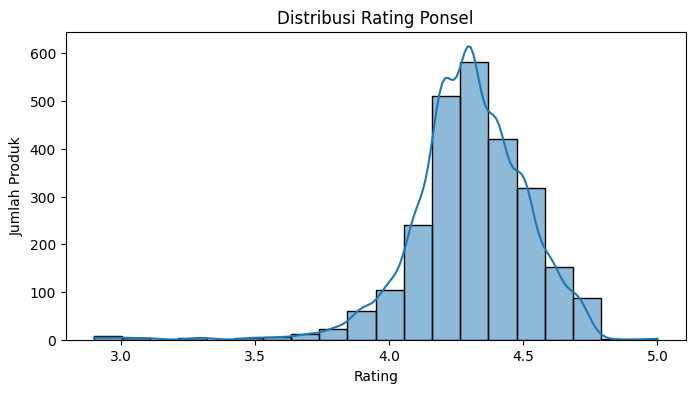

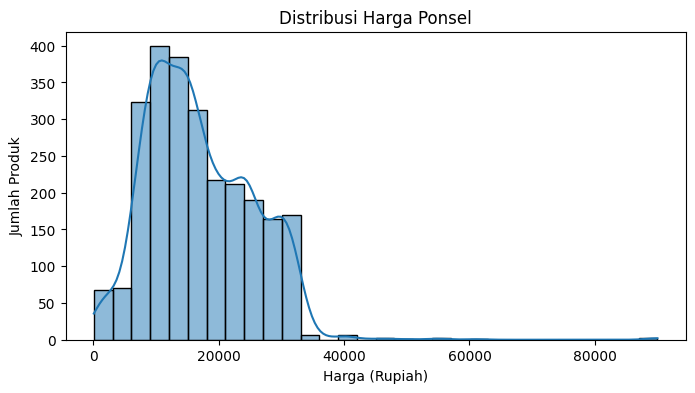

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi rating
plt.figure(figsize=(8,4))
sns.histplot(df['ratings'], bins=20, kde=True)
plt.title('Distribusi Rating Ponsel')
plt.xlabel('Rating')
plt.ylabel('Jumlah Produk')
plt.show()

# Distribusi harga (perlu bersihkan format jika ada simbol Rp)
df['price'] = df['price'].astype(str).str.replace('[₹,]', '', regex=True).astype(float)

plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Ponsel')
plt.xlabel('Harga (Rupiah)')
plt.ylabel('Jumlah Produk')
plt.show()

1. Distribusi Rating Ponsel (Grafik Atas):
- Rating berkisar antara 2.9 hingga 5.0.
- Sebagian besar produk memiliki rating antara 4.0 hingga 4.5.
- Distribusi terlihat miring ke kiri (left-skewed), menunjukkan bahwa sebagian besar ponsel memiliki rating tinggi.
- Sangat sedikit produk yang memiliki rating di bawah 3.5.
2. Distribusi Harga Ponsel (Grafik Bawah):
- Harga berkisar dari sekitar 0 hingga lebih dari 90.000 Rupiah.
- Sebagian besar produk berada pada kisaran harga 5.000 hingga 30.000 Rupiah.
- Distribusi terlihat miring ke kanan (right-skewed), artinya lebih banyak ponsel dengan harga murah dibandingkan mahal.
- Ada beberapa outlier dengan harga yang sangat tinggi.

Konsumen cenderung memberikan rating tinggi untuk sebagian besar produk. Pasar didominasi oleh ponsel dengan harga menengah ke bawah, meskipun ada beberapa produk mahal.

**5. Cek Korelasi**

Cek korelasi penting untuk mengetahui seberapa kuat hubungan antara dua variabel, misalnya antara rating dan harga. Ini membantu memahami apakah harga memengaruhi rating atau tidak.

In [22]:
# Korelasi antara rating dan harga
print(df[['ratings', 'price']].corr())

          ratings     price
ratings  1.000000  0.010996
price    0.010996  1.000000


Dari output tersebut terlihat bahwa korelasi antara ratings dan price sangat kecil (0,010), hampir nol, yang berarti tidak ada hubungan linear yang signifikan antara harga ponsel dan ratingnya dalam dataset ini. Jadi, harga tidak berpengaruh langsung pada rating produk.

#Preprocessing

**1. Bersihkan data teks di kolom corpus**

In [24]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # hanya huruf dan spasi
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_corpus'] = df['corpus'].fillna('').apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
print(df[['corpus', 'clean_corpus']].head(5))

                                              corpus  \
0  Storage128 GBRAM6  SystemAndroid 12Processor T...   
1  Storage128 GBRAM6 GBExpandable Storage256GB  S...   
2  Storage64 GBRAM4  SystemAndroid 11Processor Sp...   
3  Storage256 GBRAM12  SystemAndroid Q 11Processo...   
4  Storage128  SystemiOS 15Processor TypeA15 Bion...   

                                        clean_corpus  
0  storage gbram systemandroid processor typemedi...  
1  storage gbram gbexpandable storagegb systemand...  
2  storage gbram systemandroid processor speed mp...  
3  storage gbram systemandroid q processor typequ...  
4  storage systemios processor typea bionic chip ...  


kolom clean_corpus sudah berhasil diproses. Artinya, teks sudah siap digunakan untuk tahap selanjutnya

**2. Ubah teks menjadi representasi numerik**

menggunakan teknik seperti TF-IDF Vectorizer untuk mengubah deskripsi corpus menjadi vektor fitur yang bisa dihitung kemiripannya

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['clean_corpus'])

In [28]:
print(tfidf_matrix.shape)  # baris x kolom fitur
print(tfidf.get_feature_names_out()[:10])  # 10 kata pertama di TF-IDF

(2533, 1006)
['aa' 'aabody' 'aatp' 'ab' 'access' 'accurate' 'active' 'adaptive'
 'adaptivesync' 'adisplay']


sudah berhasil diproses dan diubah menjadi bentuk numerik (TF-IDF), dan siap digunakan

**3. Hitung kemiripan antar produk**

Menggunakan cosine similarity pada matriks TF-IDF untuk mengetahui produk mana yang paling mirip

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [29]:
# Contoh 5 baris dan kolom awal dari matriks cosine similarity
print(cosine_sim[:5, :5])

[[1.         0.19168327 0.18821448 0.14441314 0.16046031]
 [0.19168327 1.         0.14806208 0.12520959 0.20394302]
 [0.18821448 0.14806208 1.         0.20707278 0.12281501]
 [0.14441314 0.12520959 0.20707278 1.         0.06523841]
 [0.16046031 0.20394302 0.12281501 0.06523841 1.        ]]


matriks similarity sudah terbentuk dan siap digunakan untuk sistem rekomendasi.

#Modelling

**1. TF-IDF + Cosine Similarity**

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['clean_corpus'])

# Cosine similarity antar produk
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Melihat bentuk matriks
print("TF-IDF Shape:", tfidf_matrix.shape)
print("Cosine Similarity Shape:", cosine_sim.shape)

TF-IDF Shape: (2533, 992)
Cosine Similarity Shape: (2533, 2533)


**2. K-Nearest Neighbors (KNN) dengan Cosine Distance**

In [31]:
from sklearn.neighbors import NearestNeighbors

# Inisialisasi model KNN dengan metrik cosine
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit model menggunakan tf-idf matrix
knn_model.fit(tfidf_matrix)

# Melihat struktur model
print("Model KNN telah dilatih menggunakan TF-IDF matrix.")

Model KNN telah dilatih menggunakan TF-IDF matrix.


#Evaluasi

Evaluasi dalam Content-Based Filtering berbeda dari supervised learning karena:
- Tidak ada label benar/salah eksplisit (seperti “produk A cocok direkomendasikan ke user X”).
- Evaluasi lebih fokus pada kualitas kemiripan antar item atau seberapa relevan hasil rekomendasinya.

In [32]:
# Pilih satu produk secara acak
product_index = 10
print("Produk acuan:", df.iloc[product_index]['name'])
print("Deskripsi:", df.iloc[product_index]['clean_corpus'])

# Ambil top 5 produk paling mirip (selain dirinya sendiri)
sim_scores = list(enumerate(cosine_sim[product_index]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_similar = sim_scores[1:6]  # skip index ke-0 (dirinya sendiri)

# Tampilkan hasil
print("\nTop 5 produk mirip:")
for idx, score in top_similar:
    print(f"- {df.iloc[idx]['name']} (Skor: {score:.4f})")

Produk acuan: vivo Z1Pro (Sonic Black, 64 GB)
Deskripsi: storage gbram gbexpandable storagegb systemandroid pie processor typequalcomm snapdragon aie octa core ghzprocessor speed mp mp mp mp mp mp mp mp g capacity display size cm inchresolution x pixelsresolution typefull hdgpuadreno display colorsmother display featuresbezel mm screen body ratio

Top 5 produk mirip:
- vivo Z1Pro (Sonic Blue, 64 GB) (Skor: 1.0000)
- vivo Z1Pro (Mirror Black, 64 GB) (Skor: 1.0000)
- vivo Z1Pro (Sonic Blue, 128 GB) (Skor: 1.0000)
- vivo V15 Pro (Topaz Blue, 128 GB) (Skor: 0.8039)
- vivo S1 Pro (Dreamy White, 128 GB) (Skor: 0.7401)


Dari output di atas, sistem berhasil merekomendasikan produk yang sangat relevan dengan produk acuan "vivo Z1Pro (Sonic Black, 64 GB)".

Tiga produk teratas memiliki skor kemiripan 1.0000, artinya deskripsinya identik—kemungkinan varian warna atau kapasitas berbeda dari model yang sama. Dua produk berikutnya juga masih dari merek vivo, dengan skor kemiripan tinggi (0.8039 dan 0.7401), menunjukkan bahwa sistem mampu mengenali produk-produk yang serupa dalam spesifikasi.

Sistem rekomendasi berbasis content-based filtering ini bekerja dengan baik dalam mengidentifikasi produk-produk yang mirip dari sisi fitur teknis.

**Distribusi Skor Kemiripan**

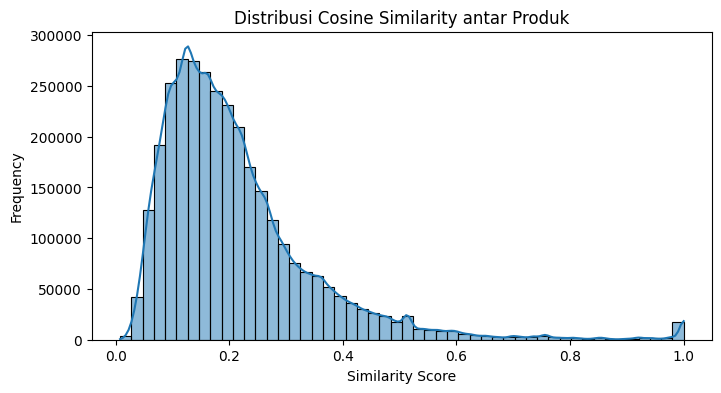

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil semua skor cosine similarity (kecuali diagonal)
import numpy as np
cosine_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]

# Visualisasi
plt.figure(figsize=(8, 4))
sns.histplot(cosine_scores, bins=50, kde=True)
plt.title("Distribusi Cosine Similarity antar Produk")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

dari output tersebut dapat dilihat bahwa Sebagian besar produk di dataset memiliki kemiripan rendah hingga sedang, sementara hanya sedikit yang benar-benar sangat mirip atau identik. Ini wajar dalam sistem rekomendasi produk yang memiliki banyak variasi.